<a href="https://colab.research.google.com/github/saitejachava2/Textclassification/blob/main/textclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install altair

ERROR: Operation cancelled by user


In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
from urllib.request import urlopen
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('/content/Text_Classification.csv', encoding= 'unicode_escape')

In [ ]:
df

,Writings,Area
0,Obama went on to use those 3 million contacts ...,politics
1,Send registered voters a friendly text on elec...,politics
2,There are millions of U.S. citizens who still ...,politics
3,Use your voice to encourage voter registration,politics
4,Organize rallies and recruit volunteers all w...,politics
...,...,...
69,Breastfeed babies from 0 to 2 years and beyond,Health
70,Talk to someone you trust if you're feeling down,Health
71,Take antibiotics only as prescribed,Health
72,Clean your hands properly,Health


In [ ]:
df = df.dropna()

In [ ]:
df['id'] = 1
df1 = pd.DataFrame(df.groupby('Area').count()['id']).reset_index()

bars = alt.Chart(df1).mark_bar(size=50).encode(
    x=alt.X('Area'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='percentage of writings')),
    color='Area'
).transform_window(
    Totalwritings='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.Totalwritings"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300,
    width=700,
    title = "percentage of writings in each Area",
)

alt.LayerChart(...)

In [ ]:
df['Writings_len'] = df['Writings'].str.len()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


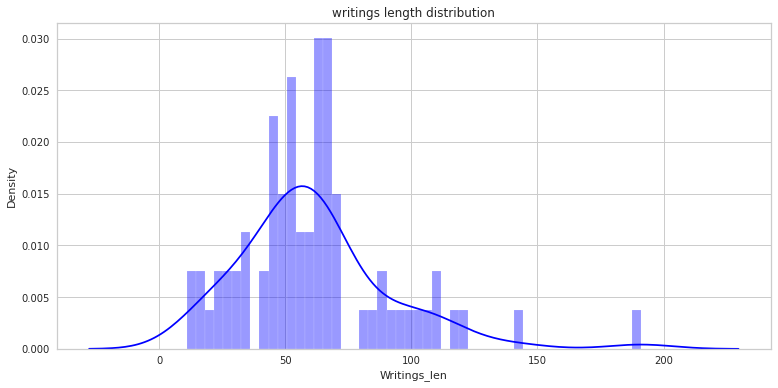

In [ ]:
plt.figure(figsize=(12.8,6))
sns.distplot(df['Writings_len'], kde=True, color="blue", bins=50).set_title('writings length distribution');

In [ ]:
quantile_75 = df['Writings_len'].quantile(0.75)
df_75 = df[df['Writings_len'] < quantile_75]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


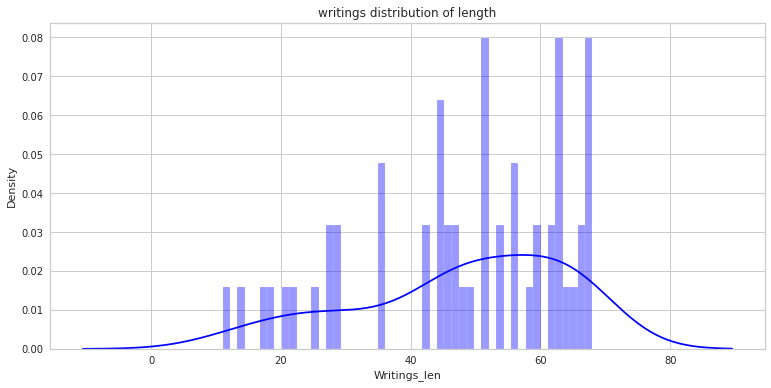

In [ ]:
plt.figure(figsize=(12.8,6))
sns.distplot(df_75['Writings_len'], kde=True, color="blue", bins=50).set_title('writings distribution of length');

In [ ]:
df['Writings_len'].describe()

count     74.000000
mean      61.432432
std       30.521531
min       11.000000
25%       45.000000
50%       58.500000
75%       68.750000
max      191.000000
Name: Writings_len, dtype: float64

In [ ]:
df = df.drop('Writings_len',axis=1)

In [ ]:
df = df.reset_index()

In [ ]:
df

,index,Writings,Area,id
0,0,Obama went on to use those 3 million contacts ...,politics,1
1,1,Send registered voters a friendly text on elec...,politics,1
2,2,There are millions of U.S. citizens who still ...,politics,1
3,3,Use your voice to encourage voter registration,politics,1
4,4,Organize rallies and recruit volunteers all w...,politics,1
...,...,...,...,...
69,69,Breastfeed babies from 0 to 2 years and beyond,Health,1
70,70,Talk to someone you trust if you're feeling down,Health,1
71,71,Take antibiotics only as prescribed,Health,1
72,72,Clean your hands properly,Health,1


In [ ]:
X, y = df['Writings'], df.Area;

In [ ]:
data1 = pd

In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
documents = []

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Removing special characters
    document = re.sub(r'\W', ' ', str(X[sen]))

    # removing single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

    # Removing each characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

    # Substitute many spaces into single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Remove prefixed 'b'
    document = re.sub(r'^b\s+', '', document)

    # Convert to Lowercase
    document = document.lower()

    # Lemmatization
    document = document.split()

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)

    documents.append(document)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=2100, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2100, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(documents).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape

(59, 1)

In [ ]:
X_test.shape

(15, 1)

In [ ]:
pip install yellowbrick

In [ ]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
km = KMeans(n_clusters=3, random_state=42)
print("This is the K-means: ", km.fit(X))
labels = km.labels_
print("These are the labels: ", labels)
centroids= km.cluster_centers_
print("These are the cluster centers:\n ", centroids)

This is the K-means:  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)
These are the labels:  [2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
These are the cluster centers:
  [[1.38777878e-17]
 [1.00000000e+00]
 [0.00000000e+00]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  """


In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
predict1 = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict1)

0.13333333333333333